<a href="https://colab.research.google.com/github/Abbhiraami/bayesian_stats/blob/main/statistical_rethinking/chapter_02_stat_rethinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Rethinking - Chapter 02 exercise problems

Small worlds and large worlds

1. Grid approximation
2. Quadratic approximation
3. Monte carlo markov chain

##### Importing packages

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random

2M1. Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.

1. W,W,W
2. W,W,W,L
3. L,W,W,L,W,W

In [3]:
def grid_approx(success=1,trails=1,size=10):
  ### creating a probability grid ###
  p_grid=np.linspace(0,1,size)

  ### defining prior ###
  prior=np.repeat(1,size)

  ### likelihood ###
  likelihood=stats.binom.pmf(success,trails,p_grid)

  ### posterior ###
  pos_unstd=prior*likelihood
  pos_std=pos_unstd/np.sum(pos_unstd)

  return p_grid, pos_std

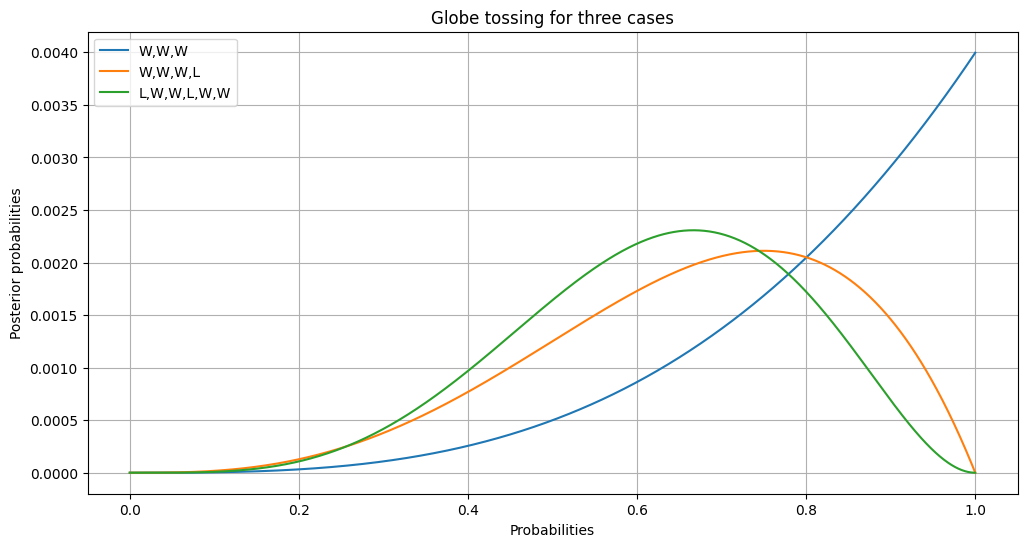

In [4]:
fig,ax=plt.subplots(figsize=(12,6))
for i,j,z in zip((3,3,4),(3,4,6),('W,W,W','W,W,W,L','L,W,W,L,W,W')):
  probs, posterior=grid_approx(i,j,1000)
  ax.plot(probs,posterior,label=z)
  ax.set_xlabel('Probabilities')
  ax.set_ylabel('Posterior probabilities')
  ax.set_title('Globe tossing for three cases')
  ax.grid()
  ax.legend()

2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p >= 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

In [5]:
def grid_approx(success=1,trails=1,size=10):
  ### creating a probability grid ###
  p_grid=np.linspace(0,1,size)

  ### defining prior ###
  prior=np.where(p_grid>=0.5,p_grid,0)

  ### likelihood ###
  likelihood=stats.binom.pmf(success,trails,p_grid)

  ### posterior ###
  pos_unstd=prior*likelihood
  pos_std=pos_unstd/np.sum(pos_unstd)

  return p_grid, pos_std

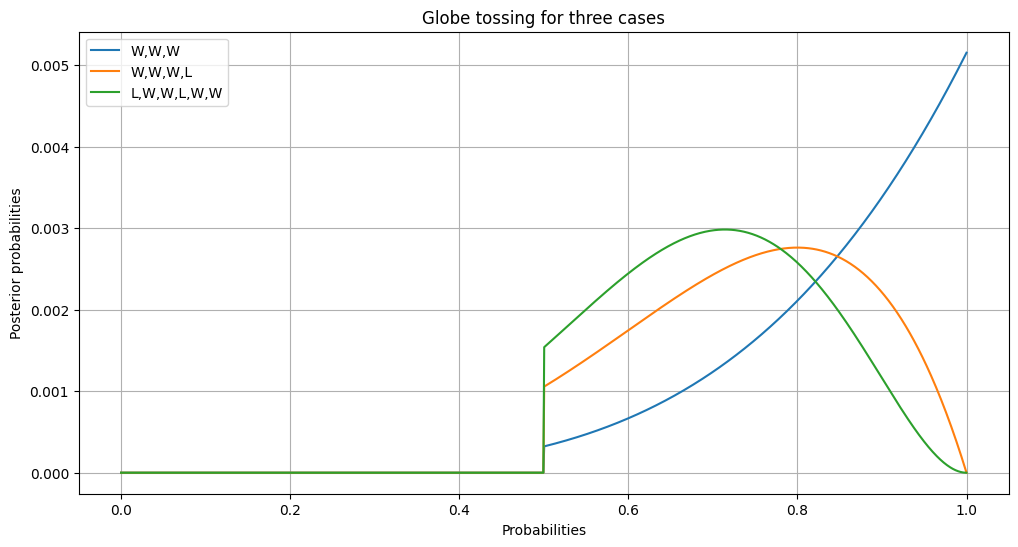

In [6]:
fig,ax=plt.subplots(figsize=(12,6))
for i,j,z in zip((3,3,4),(3,4,6),('W,W,W','W,W,W,L','L,W,W,L,W,W')):
  probs, posterior=grid_approx(i,j,1000)
  ax.plot(probs,posterior,label=z)
  ax.set_xlabel('Probabilities')
  ax.set_ylabel('Posterior probabilities')
  ax.set_title('Globe tossing for three cases')
  ax.grid()
  ax.legend()

2M3. Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Futher suppose that one of these globes, you don't know which, was tossed in the air and produced a "land" observation. Assume that each globe was equally likely to be tossed. Show the posterior probability that the globe was the Earth, conditional on seeing "land" Pr(Earth|Land) = 0.23

Let's use bayes rule here,

$
\begin{align}
P(Land/Earth)=0.3 \\
P(Land/Mars)=1 \\
P(Earth)=0.5
\end{align}
$


$
Pr(Earth|Land)=\frac{P(Land|Earth) * P(Earth)}{P(Land)}
$

We have $P(Earth|Land) is 23%,

$
P(Land)=P(Land|Earth) * P(Earth) + P(Land|Mars) * P(Mars) = (0.3*0.23)+(1*0.5) = 0.569
$

$
Pr(Earth|Land)=\frac{0.3 * 0.5}{0.569}=0.23
$

In [7]:
GLOBES = ('Earth', 'Mars')
p_land = {'Earth':.3, 'Mars':1}

n_sims = 10**7
n_land = 0
n_earth = 0

while n_land < n_sims:
    globe = random.choice(GLOBES)
    if random.random() <= p_land[globe]:
        n_land += 1

        if globe == 'Earth':
            n_earth += 1

print(f'When we\'ve gotten land, the globe was Earth approximately {n_earth/n_land}% of the time.')
print(f'This is simply 0.3 / (0.3 + 1.0) = {round(0.3 / (0.3 + 1.0), 6)}')

When we've gotten land, the globe was Earth approximately 0.2307885% of the time.
This is simply 0.3 / (0.3 + 1.0) = 0.230769


2M4. Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don’t know the color of the side facing down. Show that the probability that the other side is also black is 2/3.

In [8]:
cards = (('B', 'B'), ('B', 'W'), ('W', 'W'))
n_success=0
n_trails=0

while n_trails< 10**5:
  card=random.choice(cards)
  side_num=random.randint(0,1)
  color_side_up=card[side_num]
  color_side_down=card[1-side_num]

  if (color_side_up=='B')  :
    n_trails+=1
    if  (color_side_down=='B'):
      n_success+=1
print(f'The probability that the other side is also black {n_success/n_trails}.')


The probability that the other side is also black 0.66649.


2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

In [9]:
cards = (('B', 'B'), ('B', 'W'), ('W', 'W'),('B','B'))
n_success=0
n_trails=0

while n_trails< 10**5:
  card=random.choice(cards)
  side_num=random.randint(0,1)
  color_side_up=card[side_num]
  color_side_down=card[1-side_num]

  if (color_side_up=='B')  :
    n_trails+=1
    if  (color_side_down=='B'):
      n_success+=1
print(f'The probability that the other side is also black {n_success/n_trails}.')


The probability that the other side is also black 0.80073.


2M6. Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5.

In [10]:
cards = (('B', 'B'), ('B', 'W'),('B', 'W'), ('W', 'W'),('W', 'W'),('W', 'W'))
n_success=0
n_trails=0

while n_trails< 10**6:
  card=random.choice(cards)
  side_num=random.randint(0,1)
  color_side_up=card[side_num]
  color_side_down=card[1-side_num]

  if (color_side_up=='B')  :
    n_trails+=1
    if  (color_side_down=='B'):
      n_success+=1
print(f'The probability that the other side is also black {n_success/n_trails}.')


The probability that the other side is also black 0.500569.


2M7. Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

In [11]:
cards = (('B', 'B'), ('B', 'W'), ('W', 'W'))
n_success=0
n_trails=0

while n_trails< 10**6:
  pick_1=random.choice(cards)
  side_num_1=random.randint(0,1)
  pick1_side_up=pick_1[side_num_1]
  pick1_side_down=pick_1[1-side_num_1]

  new_card=[x for x in cards if x!=pick_1]

  pick_2=random.choice(new_card)
  side_num_2=random.randint(0,1)
  pick2_side_up=pick_2[side_num_2]
  pick2_side_down=pick_2[1-side_num_2]

  if (pick1_side_up=='B') & (pick2_side_up=='W'):
    n_trails+=1
    if (pick1_side_down=='B'):
      n_success+=1

print(f'The probability that the other side is also black {n_success/n_trails}.')


The probability that the other side is also black 0.750519.


2H1. Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

In [12]:
species=('A','B')
twin_prob={'A':.1,'B':.2}
n_success=0
n_twins=0

while n_twins<10**6:
  pandas=random.choice(species)
  if random.random()<=twin_prob[pandas]:
    n_twins+=1
    if random.random()<=twin_prob[pandas]:
      n_success+=1
n_success/n_twins *100

16.7012

2H2. Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

In [29]:
species=('A','B')
twin_prob={'A':.1,'B':.2}
n_success=0
n_twins=0
n_sims=10**6
panda_counts = {panda:0 for panda in species}

while n_twins<n_sims:
  pandas=random.choice(species)
  if random.random()<=twin_prob[pandas]:
    n_twins+=1
    panda_counts[pandas]+=1

panda_counts['A']/n_twins

0.333701

2H3. Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

In [32]:
species=('A','B')
twin_prob={'A':.1,'B':.2}
n_success=0
n_twins=0
n_single=0
panda_counts = {panda:0 for panda in species}

while n_twins<n_sims:
  pandas=random.choice(species)
  if random.random()<=twin_prob[pandas]:
    n_twins+=1
    panda_counts[pandas]+=1
    if random.random()<=(1-twin_prob[pandas]):
      n_success+=1
      n_single+=1


n_success/panda_counts['A']

2.5060054324121896

In [36]:
panda_counts['A']/n_success
n_single/n_sims

0.833119

In [23]:
(1/4*0.9)/((1/4*0.9)+(1/4*0.8))

0.5294117647058824